<a href="https://colab.research.google.com/github/satriayyp/PCVK_Ganjil_2023/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


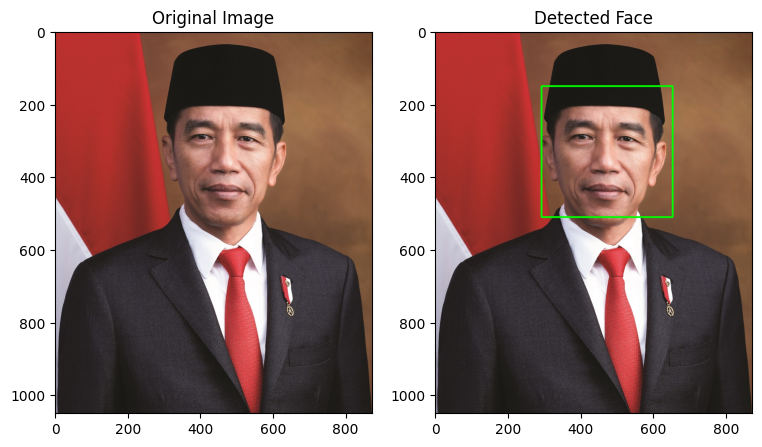

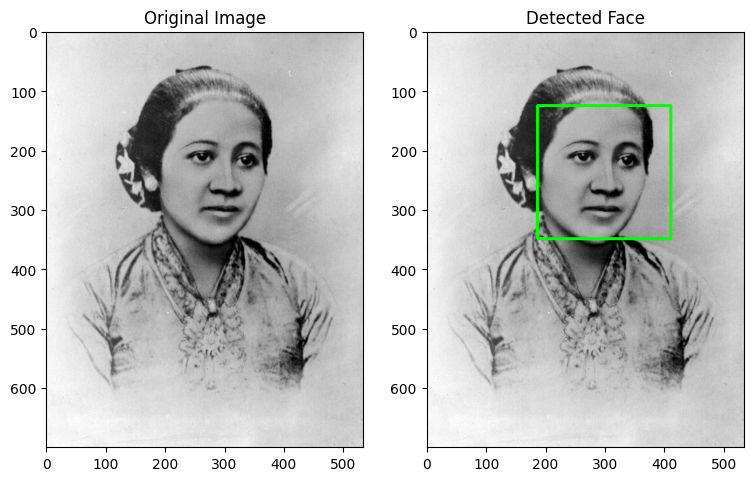

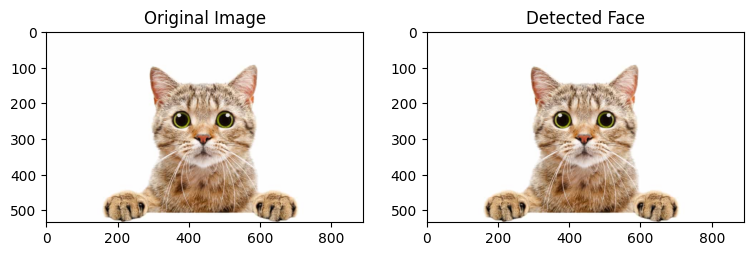

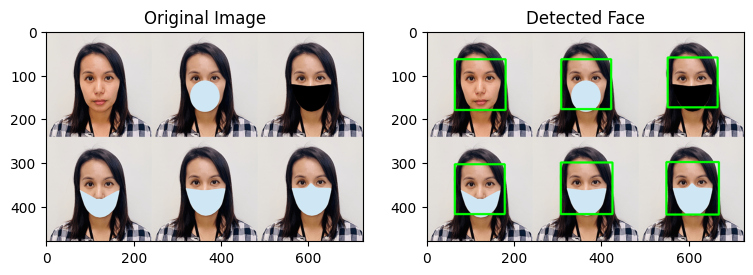

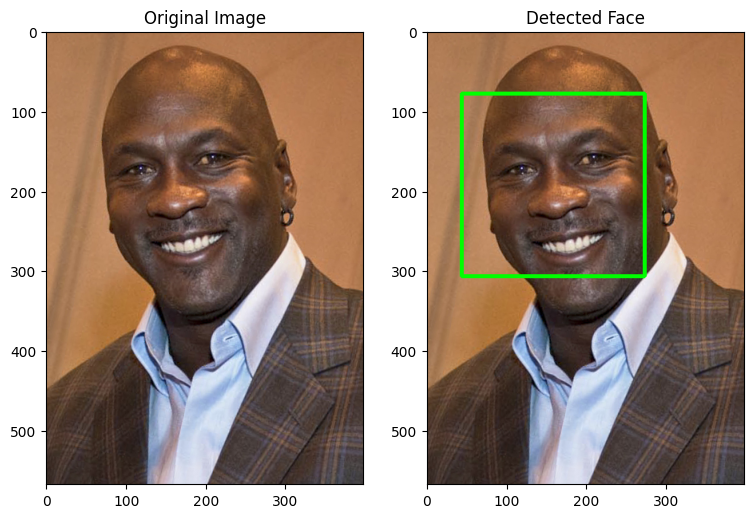

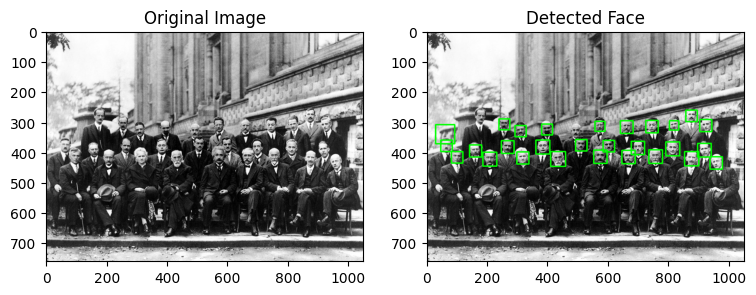

In [5]:
def faceDetection(image_path,cascade_path):
  klaf_wajah = cv2.CascadeClassifier(cascade_path)
  ori_img = cv2.cvtColor(image_path, cv2.COLOR_BGR2RGB)
  copy_img = ori_img.copy()

  wajah = klaf_wajah.detectMultiScale(copy_img)

  # melakukan deteksi wajah
  for (x, y, w, h) in wajah:
      cv2.rectangle(copy_img, (x, y), (x + w, y + h), (0, 255, 0), 4)

  plt.figure(figsize=(9, 8))
  plt.subplot(121), plt.imshow(ori_img), plt.title('Original Image')
  plt.subplot(122), plt.imshow(copy_img), plt.title('Detected Face')

img_path = '/content/drive/MyDrive/Colab Notebooks/facedet'
list_face = ['jokowi.jpg', 'kartini.jpg','kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

for file in list_face:
  image = cv2.imread(os.path.join(img_path, file))
  cascade_file = '/content/drive/MyDrive/Colab Notebooks/haarcascades/haarcascade_frontalface_alt.xml'
  faceDetection(image,cascade_file)


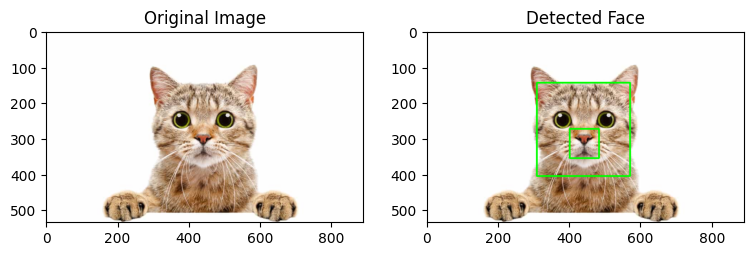

In [6]:
face_cat = cv2.imread('/content/drive/MyDrive/Colab Notebooks/facedet/kucing.jpg')
cascade_cat = '/content/drive/MyDrive/Colab Notebooks/haarcascades/haarcascade_frontalcatface.xml'
faceDetection(face_cat,cascade_cat)

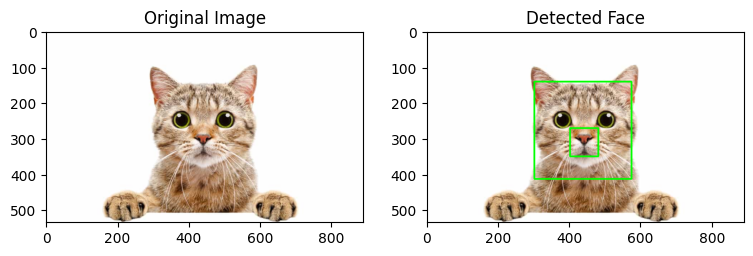

In [7]:
cascade_cat = '/content/drive/MyDrive/Colab Notebooks/haarcascades/haarcascade_frontalcatface_extended.xml'
faceDetection(face_cat,cascade_cat)

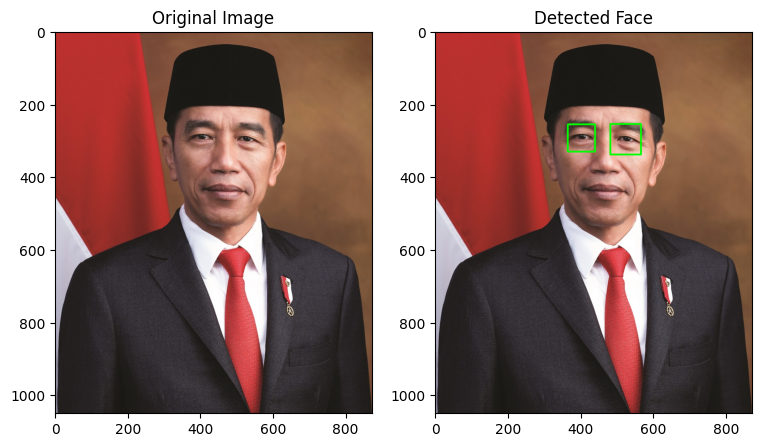

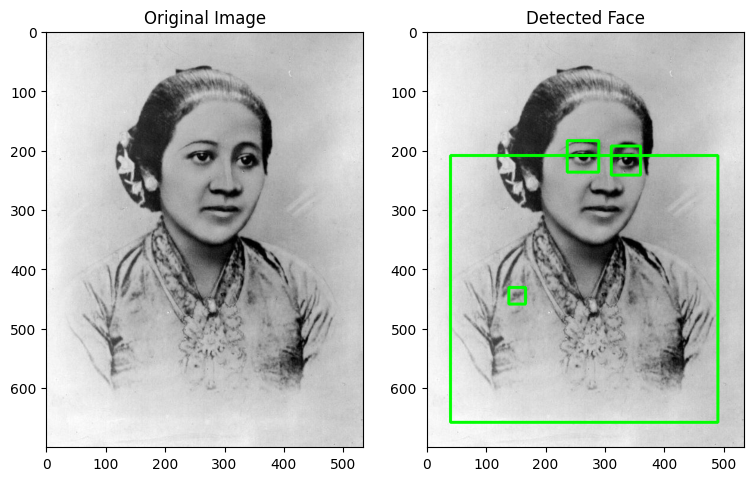

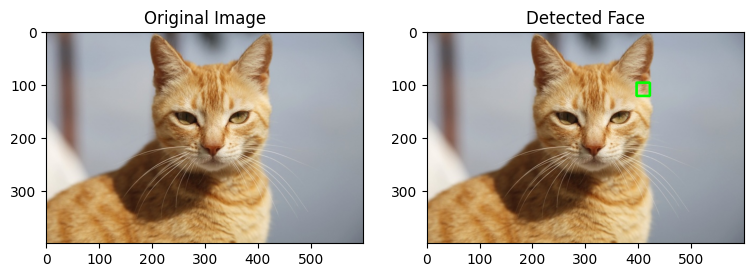

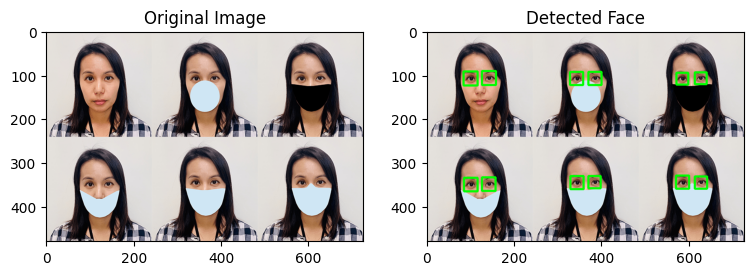

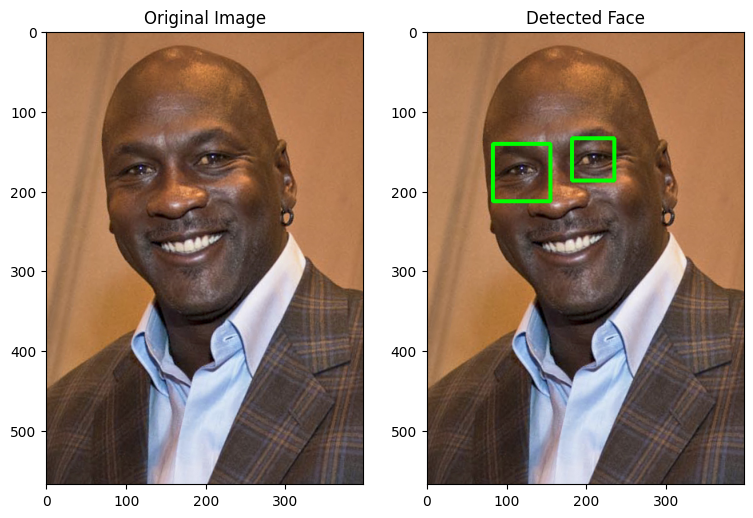

In [11]:
img_path = '/content/drive/MyDrive/Colab Notebooks/facedet'
list_face = ['jokowi.jpg', 'kartini.jpg','mycat.jpg','mask.png', 'mjordan.jpg']

for file in list_face:
  image = cv2.imread(os.path.join(img_path, file))
  cascade_eye = '/content/drive/MyDrive/Colab Notebooks/haarcascades/haarcascade_eye.xml'
  faceDetection(image,cascade_eye)

Face Tracking Dengan Google Collab

In [3]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time


In [4]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):

  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):

  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [5]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [1]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename


<IPython.core.display.Javascript object>

(720, 1280)
Saved to photo.jpg


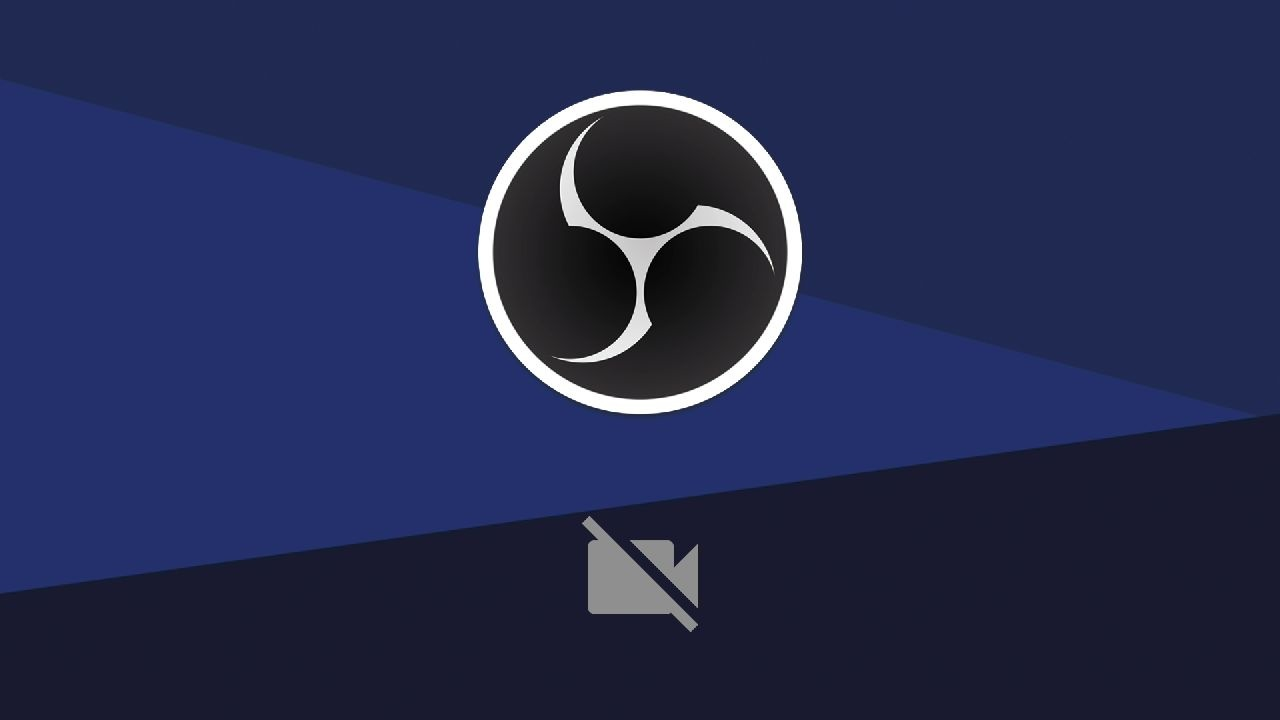

In [6]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

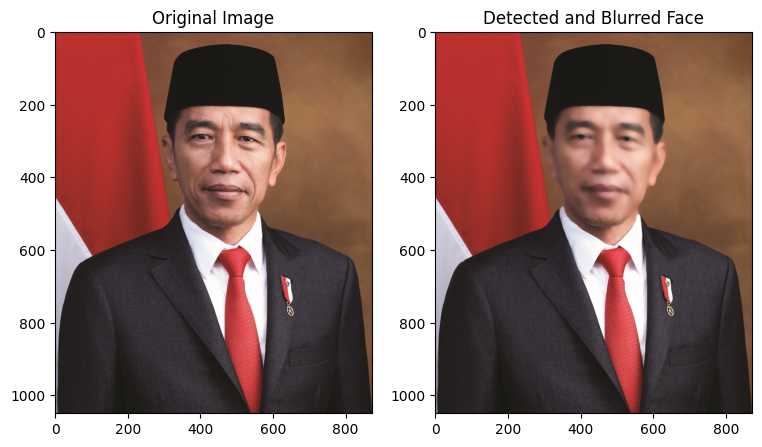

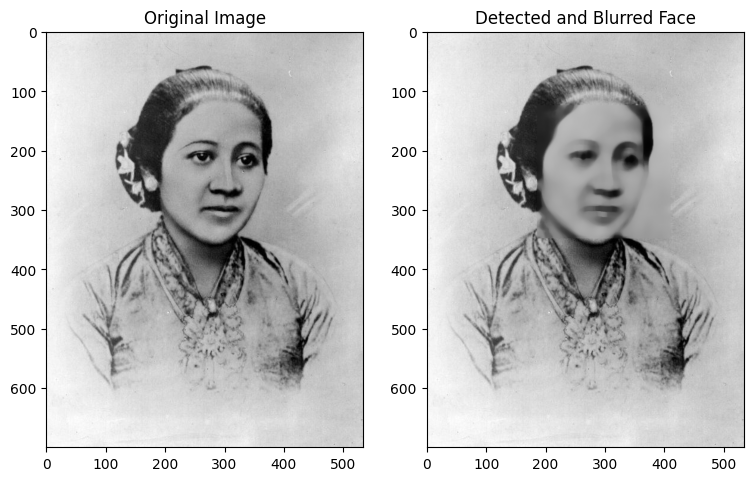

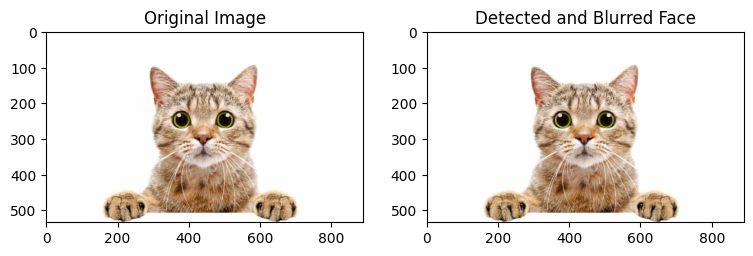

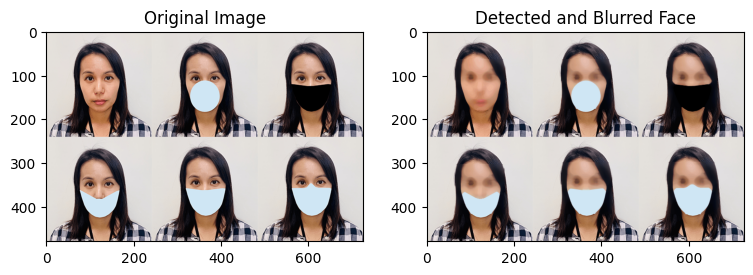

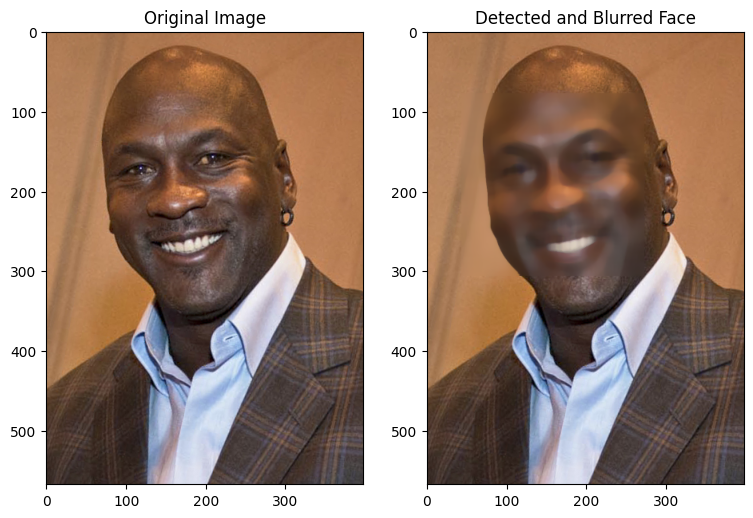

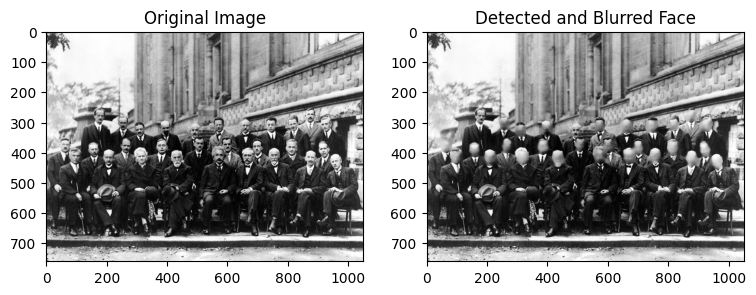

In [8]:
import cv2
import os
import matplotlib.pyplot as plt

def faceBlurDetection(image_path, cascade_path):
    klasif_wajah = cv2.CascadeClassifier(cascade_path)
    rgb_img = cv2.cvtColor(image_path, cv2.COLOR_BGR2RGB)
    copy_imgg = rgb_img.copy()

    face = klasif_wajah.detectMultiScale(copy_imgg)

    # melakukan deteksi wajah
    for (x, y, w, h) in face:
        # Mendapatkan area wajah
        face_ro = copy_imgg[y:y+h, x:x+w]

        # Melakukan blurring pada area wajah
        face_ro = cv2.medianBlur(face_ro, 15)

        # Menempatkan wajah yang sudah di-blur ke dalam citra asli
        copy_imgg[y:y+h, x:x+w] = face_ro

        # # Menampilkan kotak deteksi wajah
        # cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 4)

    plt.figure(figsize=(9, 8))
    plt.subplot(121), plt.imshow(rgb_img), plt.title('Original Image')
    plt.subplot(122), plt.imshow(copy_imgg), plt.title('Detected and Blurred Face')

img_path = '/content/drive/MyDrive/Colab Notebooks/facedet'
list_face = ['jokowi.jpg', 'kartini.jpg', 'kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

for file in list_face:
    image = cv2.imread(os.path.join(img_path, file))
    cascade_file = '/content/drive/MyDrive/Colab Notebooks/haarcascades/haarcascade_frontalface_alt.xml'
    faceBlurDetection(image, cascade_file)

plt.show()
